In [9]:
import sys
import os
import matplotlib.pyplot as plt
import os
import cv2
import pickle

import sys
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

In [10]:
with open('sim.pickle', 'rb') as f:
    sim_dict = pickle.load(f)  # 復元

In [11]:
sim_p = sim_dict["tspoint"]
sim_o = sim_dict["orb"]
sim_to = sim_dict["torb"]
sim_s = sim_dict["sift"]
sim_ts = sim_dict["tsift"]
sim_sp = sim_dict["spoint"]

In [21]:
sim_list = [sim_sp, sim_p, sim_o, sim_to, sim_s, sim_ts]
nm_list = ["SuperPoint", "TSuperPoint", "ORB", "TORB", "SIFT", "TSIFT"]

0 SuperPoint
1 TSuperPoint
2 ORB
3 TORB
4 SIFT
5 TSIFT


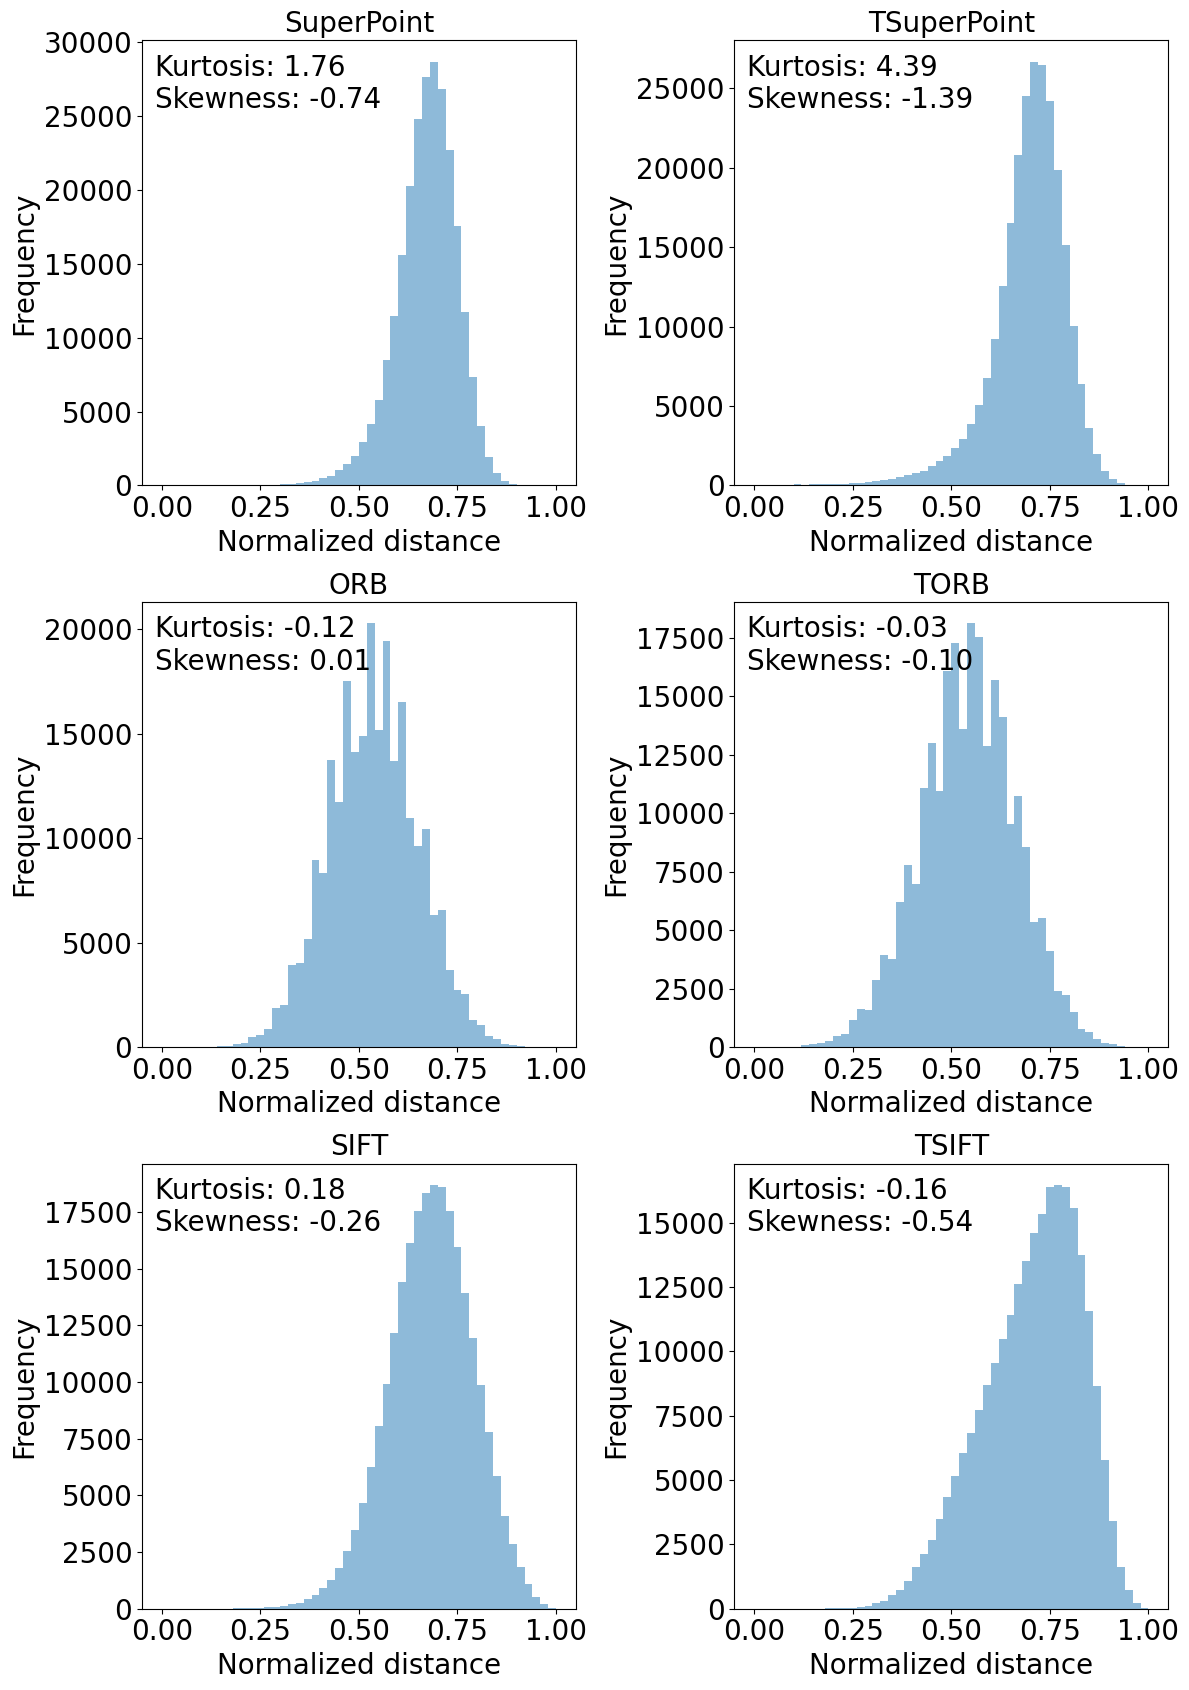

In [40]:
def plot(sim_list):
    fig_img, axs = plt.subplots(3, 2, figsize=(12, 17))
    #axs[0].set_title("All", fontsize=20)
    #axs[1].set_title("Less than 99.9% confidence lower bound", fontsize=20)
    for idx, sim in enumerate(sim_list):
        ax = axs[idx//2, idx%2]
        flat_sim = sim.flatten().copy()
        flat_sim = -flat_sim
        flat_sim = (flat_sim - np.min(flat_sim)) / (np.max(flat_sim) - np.min(flat_sim))
        kurt = kurtosis(flat_sim)
        sk = skew(flat_sim)
        print(idx, nm_list[idx])
        ax.set_title(f"{nm_list[idx]}", fontsize=20)
        ax.hist(flat_sim, bins=50, label=f"kurt:{kurt:.3f}, skew:{sk:.3f}", alpha=0.5)
        ax.text(x=0.03, y=0.97, s=f'Kurtosis: {kurt:.2f}\nSkewness: {sk:.2f}', fontsize=20,
                horizontalalignment='left', verticalalignment='top', 
                transform=ax.transAxes)
        ax.tick_params(axis='both', labelsize=20)
        ax.set_ylabel('Frequency', fontsize=20)
        ax.set_xlabel('Normalized distance', fontsize=20)
        #ax.legend(loc='upper left', fontsize=20)
    plt.tight_layout()
    plt.show()
plot(sim_list)

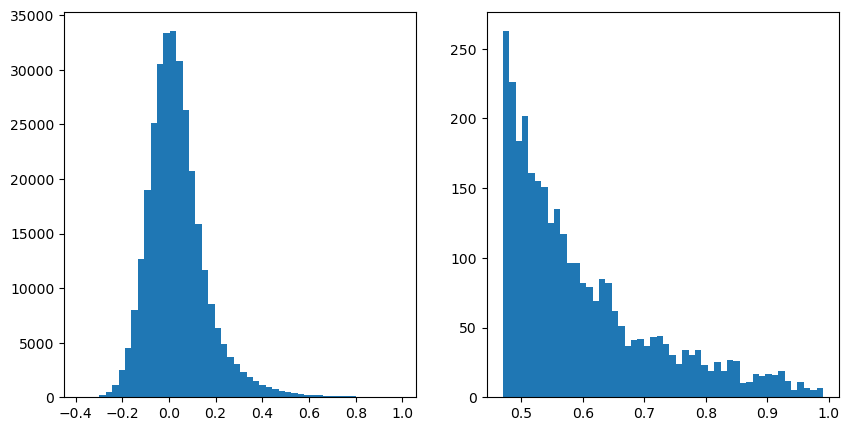

In [7]:
flattened_array = sim.flatten()
filtered_array2 = flattened_array.copy()#[flattened_array > 0]
threshold = np.percentile(flattened_array, 99)
filtered_array = flattened_array[flattened_array >= threshold].copy()
fig_img, axs_img = plt.subplots(1, 2, figsize=(4*2+2, 5))
axs_img[0].hist(filtered_array2, bins=50)
axs_img[1].hist(filtered_array, bins=50)
plt.show()